##### In this notebook I'm going to run an Exploratory Data Analysis on the dataset *Brazilian e-commerce website*. The analysis aims to answer some key business questions and discover the data in general. Following the EDA, a Recency, Frequency, Monetary value (RFM) analysis will be done in order to cluster the customers into predefined marketing segments. Please upvote the notebook if your enjoy this work and feel free to share your feedback or ask me anything in the comment section. 

**Let's start.**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
dfs_paths = ["../input/brazilian-ecommerce/olist_customers_dataset.csv", "../input/brazilian-ecommerce/olist_geolocation_dataset.csv",
            "../input/brazilian-ecommerce/olist_order_items_dataset.csv", "../input/brazilian-ecommerce/olist_order_payments_dataset.csv",
            "../input/brazilian-ecommerce/olist_order_reviews_dataset.csv", "../input/brazilian-ecommerce/olist_orders_dataset.csv",
            "../input/brazilian-ecommerce/olist_products_dataset.csv", "../input/brazilian-ecommerce/olist_sellers_dataset.csv",
            "../input/brazilian-ecommerce/product_category_name_translation.csv"]

In [3]:
# Set dfs
customers_df = pd.read_csv("../input/brazilian-ecommerce/olist_customers_dataset.csv")
geo_df = pd.read_csv("../input/brazilian-ecommerce/olist_geolocation_dataset.csv")
orderitem_df = pd.read_csv("../input/brazilian-ecommerce/olist_order_items_dataset.csv")
orderpay_df = pd.read_csv("../input/brazilian-ecommerce/olist_order_payments_dataset.csv")
orderreviews_df = pd.read_csv("../input/brazilian-ecommerce/olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("../input/brazilian-ecommerce/olist_orders_dataset.csv")
products_df = pd.read_csv("../input/brazilian-ecommerce/olist_products_dataset.csv")
sellers_df = pd.read_csv("../input/brazilian-ecommerce/olist_sellers_dataset.csv")
categname_df = pd.read_csv("../input/brazilian-ecommerce/product_category_name_translation.csv")
pd.set_option('display.max_columns', 500)

In [4]:
# Change cols names before merging 
customers_df.rename(columns={"customer_zip_code_prefix": "zip_code"}, inplace=True)
geo_df.rename(columns={"geolocation_zip_code_prefix": "zip_code"}, inplace=True)

In [5]:
# Join datasets
data = orders_df.merge(customers_df, on="customer_id").merge(orderitem_df, on="order_id").merge(products_df, on="product_id").merge(categname_df, on="product_category_name").merge(orderpay_df, on="order_id").merge(sellers_df, on="seller_id").merge(orderreviews_df, on="order_id")

In [6]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,zip_code,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,credit_card,1,18.12,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,3,voucher,1,2.00,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2,voucher,1,18.59,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,credit_card,3,37.77,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,credit_card,1,37.77,9350,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23


We have duplicated order_ids. This is due to the fact that the same order can be paid by multiple payment methods. 

In [7]:
# Null values 
(data.isna().sum() / len(data) ).sort_values(ascending=False)

review_comment_title             0.880623
review_comment_message           0.576971
order_delivered_customer_date    0.020760
order_delivered_carrier_date     0.010337
order_approved_at                0.000121
product_length_cm                0.000009
product_height_cm                0.000009
product_width_cm                 0.000009
product_weight_g                 0.000009
payment_installments             0.000000
product_category_name_english    0.000000
payment_sequential               0.000000
payment_type                     0.000000
order_id                         0.000000
payment_value                    0.000000
seller_zip_code_prefix           0.000000
seller_city                      0.000000
review_id                        0.000000
review_score                     0.000000
review_creation_date             0.000000
seller_state                     0.000000
product_description_lenght       0.000000
product_photos_qty               0.000000
customer_id                      0

In [8]:
# Main stats
data.describe()

,zip_code,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix,review_score
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,1.093747,2.946233,172.387379,24515.713958,4.034409
std,29841.671732,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,0.729849,2.781087,265.873969,27636.640968,1.385584
min,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000,1.000000
25%,11310.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.870000,6429.000000,4.000000
50%,24241.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.050000,13660.000000,5.000000
75%,58745.000000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.480000,28605.000000,5.000000
max,99980.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,99730.000000,5.000000


# **How are review scores distributed?**

5    56.547501
4    18.987276
1    12.582065
3     8.405920
2     3.477238
Name: review_score, dtype: float64

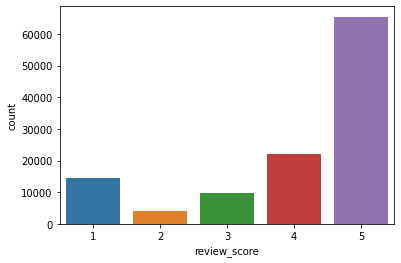

In [9]:
sns.countplot(data["review_score"])
data["review_score"].value_counts() / data["review_score"].count() * 100

Over 75% of customers gave a score equal or greater than 4. 12.5 % gave a score of 1 and about 12% gave a score of 3 or 2. 

# **Proportion of customers generating most of the revenue:**

In [10]:
# Customers wiht highest cum orders (in payments)
top_customers = data.groupby("customer_unique_id")["payment_value"].sum().reset_index().sort_values("payment_value", ascending=False)
top_customers.rename(columns={"payment_value":"total_paid"}, inplace=True)

Text(42000, 70, '40000 customers (about 42% of total customers) \ncontribute to approximately 80% of total sales.')

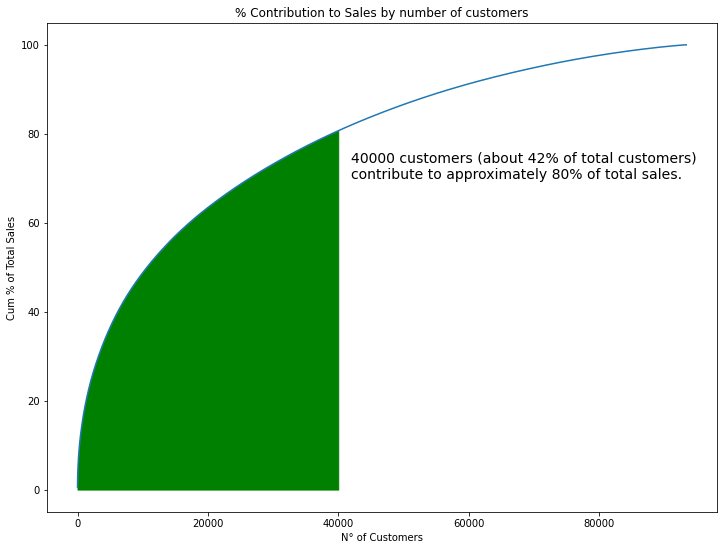

In [11]:
plt.figure(figsize=(12,9))
top_customers["% of Total Sales"] = (top_customers["total_paid"] / top_customers["total_paid"].sum()) * 100
top_customers["Cum % of Total Sales"] = top_customers["% of Total Sales"].cumsum() 
#sns.displot(top_customers["Cum % of Total Sales"])
ax = sns.lineplot(x=range(1,len(top_customers)+1), y="Cum % of Total Sales", data=top_customers)
ax.set_xlabel("N° of Customers")
ax.set_title("% Contribution to Sales by number of customers")
a=np.arange(1,len(top_customers)+1)
b=top_customers["Cum % of Total Sales"]
plt.fill_between(a, b, 0,
                 where = (a >= 0) & (a <= 40000),
                 color = 'g')
ax.text(42000, 70, """40000 customers (about 42% of total customers) 
contribute to approximately 80% of total sales.""", fontsize=14)

40000 customers (about 42% of total customers) contribute to approximately 80% of total sales.

# **Who are the top customers?**

Text(0.5, 1.0, 'Top 10 Customers by total paid')

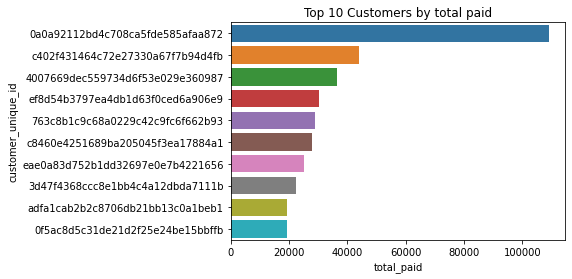

In [12]:
top_customers.rename(columns={"payment_value" : "total_paid"}, inplace=True)
ax = sns.barplot(x="total_paid", y="customer_unique_id", data=top_customers[:10])
ax.set_title("Top 10 Customers by total paid")

# **Top cites by number of orders by state**

Text(0.5, 1.0, 'TOP 10 states by num of orders')

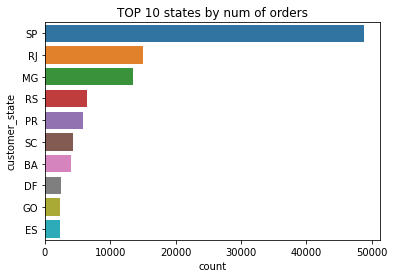

In [13]:
top_orders_cities = data.groupby("customer_state")["order_id"].count().reset_index().sort_values("order_id", ascending=False)
top_orders_cities.rename(columns={"order_id":"count"}, inplace=True)
ax = sns.barplot(x="count", y="customer_state", data=top_orders_cities[:10])
ax.set_title("TOP 10 states by num of orders")

# **Cities with highest revenue generation**

In [14]:
top_ordersbyvalue_cities = data.groupby("customer_city")["payment_value"].sum().reset_index().sort_values("payment_value", ascending=False)
top_ordersbyvalue_cities["% of Total Payments"] = (top_ordersbyvalue_cities["payment_value"] / top_ordersbyvalue_cities["payment_value"].sum()) * 100
top_ordersbyvalue_cities["Cum % of Total Payments"] = top_ordersbyvalue_cities["% of Total Payments"].cumsum() 

Text(0.5, 1.0, 'TOP 10 cities by revenue generation')

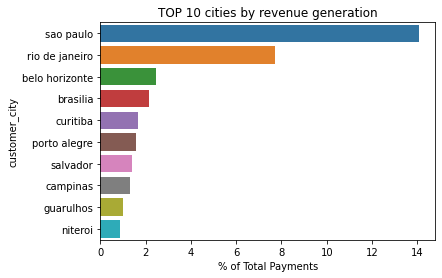

In [15]:
ax = sns.barplot(x="% of Total Payments", y="customer_city", data=top_ordersbyvalue_cities[:10])
ax.set_title("TOP 10 cities by revenue generation")

Text(1000, 70, '358 Cities (about 8.7 % of total cities) \ncontribute to approximately 80% of total sales.')

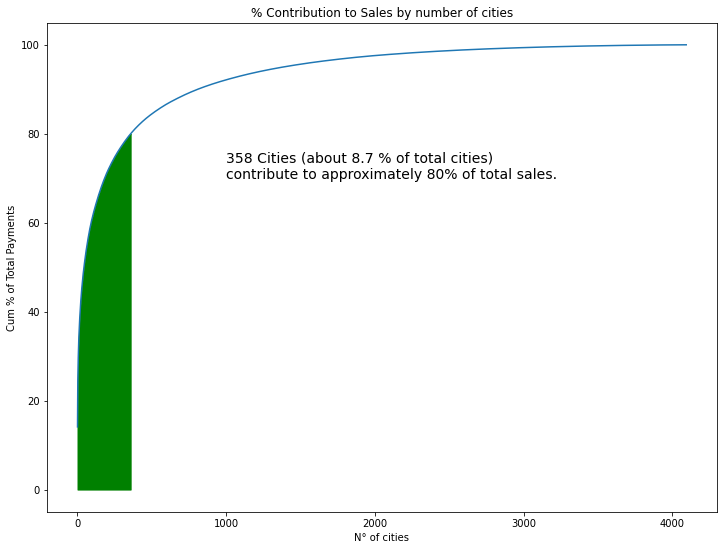

In [16]:
plt.figure(figsize=(12,9))
ax = sns.lineplot(x=range(1,len(top_ordersbyvalue_cities)+1), y="Cum % of Total Payments", data=top_ordersbyvalue_cities)
ax.set_xlabel("N° of cities")
ax.set_title("% Contribution to Sales by number of cities")
a=np.arange(1,len(top_ordersbyvalue_cities)+1)
b=top_ordersbyvalue_cities["Cum % of Total Payments"]
plt.fill_between(a, b, 0,
                 where = (a >= 0) & (a <= 358),
                 color = 'g')
ax.text(1000, 70, """358 Cities (about 8.7 % of total cities) 
contribute to approximately 80% of total sales.""", fontsize=14)

In [17]:
print("Number of cities contributing to 80% of total sales:",
      len(top_ordersbyvalue_cities[top_ordersbyvalue_cities["Cum % of Total Payments"] <= 80]),
      "or in %:",
      (len(top_ordersbyvalue_cities[top_ordersbyvalue_cities["Cum % of Total Payments"] <= 80]) / len(top_ordersbyvalue_cities)) * 100)

Number of cities contributing to 80% of total sales: 358 or in %: 8.746640605912534


# **How do orders vary across time?**

In [18]:
# Total orders by hour and dow
# But before I need to convert the dates cols to datetime 
datesCols = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", 
            "order_delivered_customer_date", "order_estimated_delivery_date", "shipping_limit_date", 
            "review_creation_date", "review_answer_timestamp"]

for col in datesCols:
    data[col] = pd.to_datetime(data[col])

In [19]:
# Orders by hour
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"])
orderbyhour = orders_df.groupby(orders_df["order_purchase_timestamp"].dt.hour)["order_id"].count().reset_index().sort_values(by="order_purchase_timestamp", ascending=False)
orderbyhour.rename(columns={"order_id":"Total Orders", "order_purchase_timestamp": "Hour of Day"}, inplace=True)

Text(0.5, 1.0, 'N° of Orders by hour')

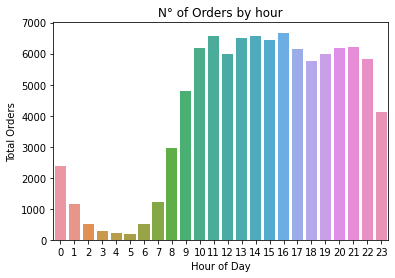

In [20]:
# Visualize data
ax = sns.barplot(x="Hour of Day", y="Total Orders", data=orderbyhour)
ax.set_title("N° of Orders by hour")

Orders start to increase at around 6 AM and peak at 4 PM.

In [21]:
# Orders by day of the week
orderbydow = data.groupby(data["order_purchase_timestamp"].dt.day_name())["order_id"].count().reset_index()
orderbydow.rename(columns={"order_id":"Total Orders", "order_purchase_timestamp": "Weekday Name"}, inplace=True)
orderbydow = orderbydow.sort_values(by="Total Orders", ascending=False)

Text(0.5, 1.0, 'N° of Orders by DOW')

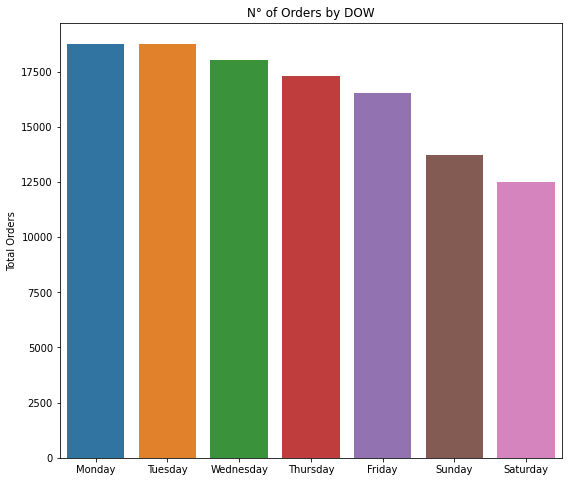

In [22]:
plt.figure(figsize = (9,8))
ax = sns.barplot(x="Weekday Name", y="Total Orders", data=orderbydow)
ax.set_xlabel('')
ax.set_title("N° of Orders by DOW")

Orders peak at the begining of the week (Monday and Tuesday) and start to decline a bit afterwards. During the weekend we obsevre a sharp decrease of orders.

# **How products are rated ?**

In [23]:
# Best and worst rated products
plt.figure(figsize=(12,12))
reviewsocres = data.groupby("product_category_name_english")["review_score"].agg(["mean", "count"]).sort_values(by="mean",ascending=False)
#ax = sns.barplot(y=bestrated.index, x=bestrated.values)
# Get only products with 30 or more reviews in order to have a more realistic idea about the rating
bestrated = reviewsocres[reviewsocres["count"]>=30][:10]
bestrated

,mean,count
product_category_name_english,,
books_general_interest,4.438503,561
books_imported,4.419355,62
flowers,4.419355,31
costruction_tools_tools,4.415842,101
books_technical,4.375465,269
food_drink,4.324138,290
small_appliances_home_oven_and_coffee,4.320513,78
luggage_accessories,4.295945,1159
fashion_sport,4.258065,31


<Figure size 864x864 with 0 Axes>

In [24]:
# Bottom 10 Products by review socre
worstrated = reviewsocres[reviewsocres["count"]>=30].sort_values(by='mean')[:10]
worstrated

,mean,count
product_category_name_english,,
diapers_and_hygiene,3.256410,39
office_furniture,3.526791,1773
fashion_male_clothing,3.548611,144
fixed_telephony,3.672862,269
fashio_female_clothing,3.780000,50
furniture_mattress_and_upholstery,3.804878,41
audio,3.840849,377
furniture_bedroom,3.841270,126
party_supplies,3.847826,46


# **Does payment method affect order status?**

In [25]:
# For example: does paying cash increase order cancelation
cashvscancel = pd.crosstab(data["payment_type"], data["order_status"])
cashvscancel = cashvscancel[["canceled", "delivered"]]
cashvscancel["% Canceled"] = (cashvscancel["canceled"] / cashvscancel["delivered"] ) * 100
cashvscancel["Avg Cancelation Rate"] = (len(data[data["order_status"] == "canceled"]) / len(data[data["order_status"] == "delivered"])) * 100
cashvscancel


order_status,canceled,delivered,% Canceled,Avg Cancelation Rate
payment_type,,,,
boleto,92,22029,0.417631,0.473456
credit_card,411,83536,0.492003,0.473456
debit_card,6,1623,0.369686,0.473456
voucher,27,6022,0.448356,0.473456


We can see that the cancelation rate is pretty much the same across the payment methods. But we notice a slight deviation above the mean for credit_card.

# **Is there any relationship between delivery time and review scores**

In [26]:
# Add delta column which computes the time it took for the order to get delivered
data["TimeToDeliveryinHours"] = (data["order_delivered_customer_date"] - data["order_purchase_timestamp"])
data["TimeToDeliveryinHours"] = data["TimeToDeliveryinHours"].apply(lambda x: x.total_seconds())
data["TimeToDeliveryinHours"] = round((data["TimeToDeliveryinHours"] / 3600) / 24, 2)
data.rename(columns={"TimeToDeliveryinHours" : "TimeToDeliveryinDays"}, inplace=True)

In [27]:
# Main stats of deliverytime
data[["TimeToDeliveryinDays"]].describe()

,TimeToDeliveryinDays
count,113209.000000
mean,12.442130
std,9.356005
min,0.530000
25%,6.740000
50%,10.190000
75%,15.500000
max,208.350000


Delivery time is quite high on average (12.44 days) with median of (10.19 days). We notice an extreme outlier of 208 days. 

<AxesSubplot:xlabel='review_score', ylabel='TimeToDeliveryinDays'>

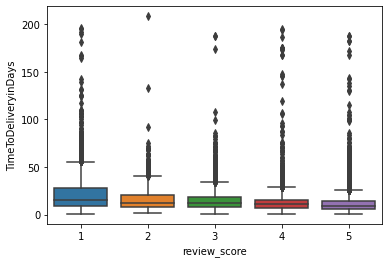

In [28]:
sns.boxplot(x="review_score", y="TimeToDeliveryinDays", data=data)

We can see that we have multiple outliers. These are orders that took very long to get delivered for some reason. 

<AxesSubplot:xlabel='review_score', ylabel='TimeToDeliveryinDays'>

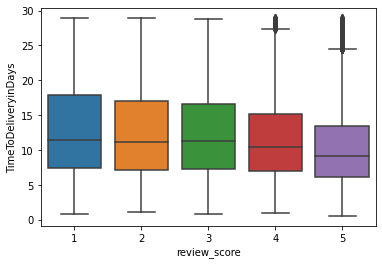

In [29]:
# Outliers removal
q_high = data["TimeToDeliveryinDays"].quantile(0.95)
data_no_outliers = data[data["TimeToDeliveryinDays"] < q_high]
sns.boxplot(x="review_score", y="TimeToDeliveryinDays", data=data_no_outliers)

Our initial hypothesis is confirmed. We can clearly see a direct relationship between timetodelivery and review_score. As the delivery time decreases, the review_score tends to go higher.

# **What are the sellers' cities with lowest/highest delivery time?**

In [30]:
# Let's see sellers with best deliverytime
sellersdeliverytime = data.groupby("seller_city")["TimeToDeliveryinDays"].agg(["min", "max", "mean", "std", "count" ]).dropna().sort_values("mean").reset_index()
# Filter for sellers with 30 or more orders in their history
sellersdeliverytime = sellersdeliverytime[sellersdeliverytime["count"]>=30]

In [31]:
fastestdeliverysellers = sellersdeliverytime[:10]
slowestdeliverysellers = sellersdeliverytime.sort_values("mean", ascending=False)[:10]

In [32]:
# Fastest delivery sellers
fastestdeliverysellers

,seller_city,min,max,mean,std,count
14,varzea paulista,2.58,21.07,5.877297,3.284975,37
41,hortolandia,1.39,71.09,7.587543,6.676258,350
53,ribeirao preto / sao paulo,2.45,27.32,7.944500,4.055726,40
60,rio claro,1.70,34.88,8.144035,6.283043,114
61,ferraz de vasconcelos,1.17,20.84,8.186316,6.443319,38
63,vicente de carvalho,1.54,42.43,8.309910,6.604570,221
67,poa,1.09,38.20,8.533029,6.005796,175
70,carazinho,3.16,19.13,8.640656,3.858348,61
79,betim,1.24,53.85,8.818312,6.242661,314
85,maua,1.51,42.57,8.977107,5.455932,484


In [33]:
# Join average review score to table above
avg_review_score_seller = data.groupby("seller_city")["review_score"].mean().dropna().sort_values(ascending=False).reset_index()

In [34]:
sellerPerf = sellersdeliverytime.merge(avg_review_score_seller, on="seller_city")

Text(0.5, 0, '')

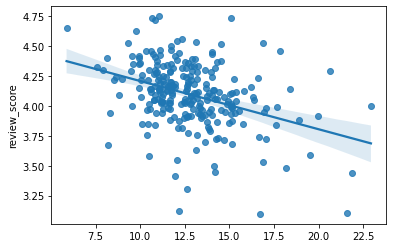

In [35]:
# Relationship between average timetodelivery and average review score
ax = sns.regplot(x="mean", y="review_score", data=sellerPerf)
ax.set_xlabel("")

We can clearly see that there is a moderate negative relationship between the time it takes for sellers to deliver their orders and the review they get.

In [36]:
# Slowest delivery sellers
slowestdeliverysellers

,seller_city,min,max,mean,std,count
515,mombuca,6.03,88.24,22.921515,17.782976,33
509,itaquaquecetuba,1.61,194.85,21.838281,12.911572,1734
507,congonhal,4.31,60.82,21.590463,12.736508,108
504,balneario camboriu,3.25,79.36,20.641613,17.449918,31
503,tubarao,6.01,81.33,19.930286,20.308568,35
499,foz do iguacu,2.98,92.78,19.490833,17.240529,192
492,bombinhas,5.13,68.10,18.875761,9.758911,92
491,criciuma,3.73,71.16,18.396000,15.760557,35
488,claudio,5.73,48.63,18.171318,8.158321,129
482,caucaia,3.14,138.88,17.841471,23.052995,34


# **States with highest/lowest time to delivery**

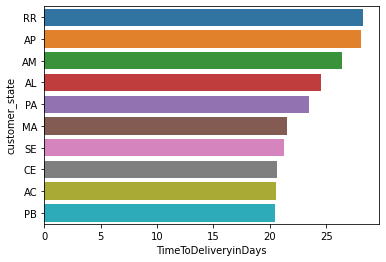

In [37]:
highestTTDstates = data.groupby("customer_state")["TimeToDeliveryinDays"].mean().dropna().sort_values(ascending=False).reset_index()
highestTTDstates = highestTTDstates[:10]
ax = sns.barplot(y="customer_state", x="TimeToDeliveryinDays", data=highestTTDstates)

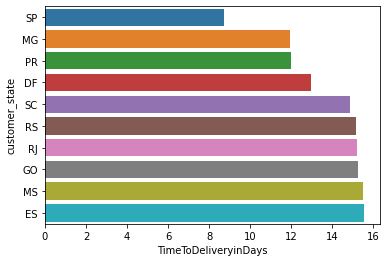

In [38]:
lowestTTDstates = data.groupby("customer_state")["TimeToDeliveryinDays"].mean().dropna().sort_values(ascending=True).reset_index()
lowestTTDstates = lowestTTDstates[:10]
ax = sns.barplot(y="customer_state", x="TimeToDeliveryinDays", data=lowestTTDstates)

# **How does average deliverytime vary across time?**

Text(0, 0.5, 'Median deliveryTime in days')

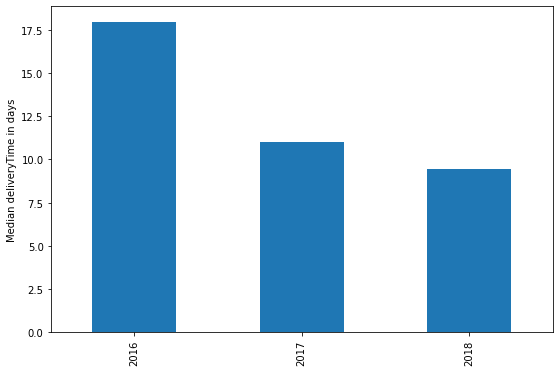

In [39]:
deliverytimevstime = data.groupby(data["order_purchase_timestamp"].dt.year)["TimeToDeliveryinDays"].median().dropna()
plt.figure(figsize=(9,6))
deliverytimevstime.plot(kind="bar")
plt.xlabel("")
plt.ylabel("Median deliveryTime in days")

We can see that the company made a significant improvement in delivery time. In 2016, the median deliverytime was exceeding 17 days while in 2017 it went down to about 12 and to about 9 days in 2018. 

# **How does average review score vary across time?**

Text(0, 0.5, 'Mean review_score')

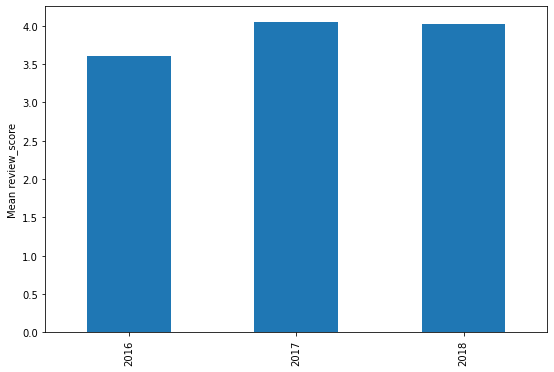

In [40]:
scorevstime = data.groupby(data["order_purchase_timestamp"].dt.year)["review_score"].mean().dropna()
plt.figure(figsize=(9,6))
scorevstime.plot(kind="bar")
plt.xlabel("")
plt.ylabel("Mean review_score")

Customers are giving better scores in 2017 and 2018 than in 2016. 

# **What are the most sold categories of product?**

In [41]:
top_categ_by_revenue = data.groupby("product_category_name_english").agg({'order_id':'nunique','payment_value':'sum'}).sort_values("payment_value", ascending=False)[:10]
top_categ_by_revenue.rename(columns={"order_id":"NumOfOrders", "payment_value":"Revenues"}, inplace=True)

In [42]:
top_categ_by_revenue

,NumOfOrders,Revenues
product_category_name_english,,
bed_bath_table,9313,1725465.67
health_beauty,8770,1646292.53
computers_accessories,6649,1592611.66
furniture_decor,6398,1427214.01
watches_gifts,5576,1420682.17
sports_leisure,7669,1390581.87
housewares,5843,1091709.15
garden_tools,3496,834757.45
auto,3877,802254.74


# **RFM ANALYSIS**

What is RFM analysis?

RFM stands for recency, frequency, monetary value. In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

Let’s assume we are a company, our company name is geek, let’s perform the RFM analysis on our customers

**Recency**: How recently has the customer made a transaction with us

**Frequency**: How frequent is the customer in ordering/buying some product from us

**Monetary**: How much does the customer spend on purchasing products from us.

> *source: geekforgeeks*

In [43]:
# Calculate recency 
df_recency = data.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
df_recency.rename(columns={"order_purchase_timestamp":"LastPurchaseDate"}, inplace=True)
df_recency["LastPurchaseDate"] = df_recency["LastPurchaseDate"].dt.date
# Get recent invoice date and use it to calculate recency
recent_date = data['order_purchase_timestamp'].dt.date.max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

In [44]:
df_recency.head()

,customer_unique_id,LastPurchaseDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,119
2,0000f46a3911fa3c0805444483337064,2017-03-10,542
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,326
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,293


In [45]:
# Calculating frequency
frequency_df = data.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index()
frequency_df.rename(columns={"order_id":"Frequency"}, inplace=True)
frequency_df.head()

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [46]:
# Calculating monetray value
monetary_df = data.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary']
monetary_df.head()

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [47]:
# Merging dfs
rf_df = df_recency.merge(frequency_df, on='customer_unique_id')
rfm_df = rf_df.merge(monetary_df, on='customer_unique_id').drop(columns='LastPurchaseDate')
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
2,0000f46a3911fa3c0805444483337064,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89


In [48]:
# Remove zeros from data before log trans
rfm_df[rfm_df.columns[1:]] = rfm_df[rfm_df.columns[1:]].applymap(lambda x: 1 if x ==0 else x)

In [49]:
# Running K-Means algo to cluster our data
# Let's check if data is skewed first
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    plt.show()
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

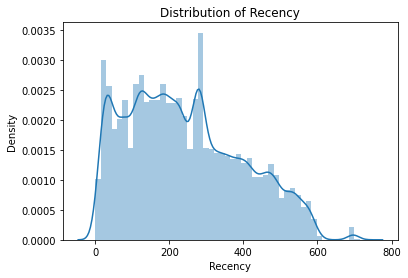

Recency's: Skew: 0.4525743664936904, : SkewtestResult(statistic=53.91755466635981, pvalue=0.0)


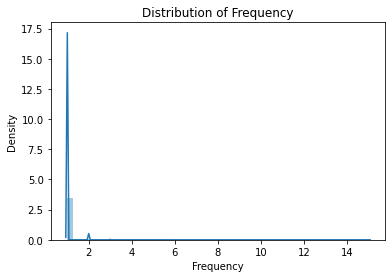

Frequency's: Skew: 10.990942154921314, : SkewtestResult(statistic=335.6456861541721, pvalue=0.0)


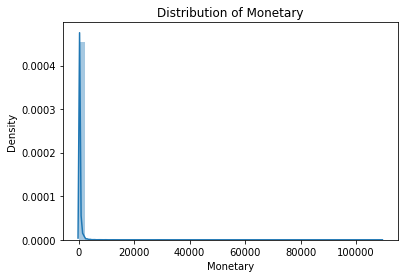

Monetary's: Skew: 70.33621193560055, : SkewtestResult(statistic=524.6379205104615, pvalue=0.0)


In [50]:
for col in rfm_df.columns[1:]:
    check_skew(rfm_df, col)
    

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical. 

We'll log transform Frequency and Monetary as they are highly skwed.

In [51]:
# Perform log transformation 
rfm_df_log = rfm_df.copy()
for c in rfm_df.columns[2:]:
    rfm_df_log[c] = np.log10(rfm_df_log[c])

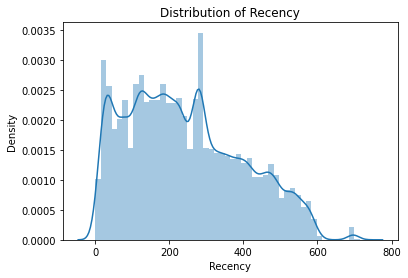

Recency's: Skew: 0.4525743664936904, : SkewtestResult(statistic=53.91755466635981, pvalue=0.0)


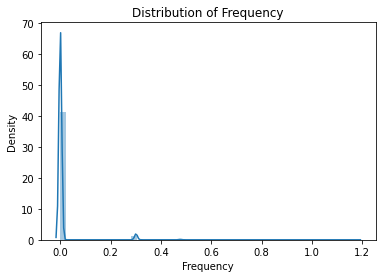

Frequency's: Skew: 6.068294981630156, : SkewtestResult(statistic=275.4417097222108, pvalue=0.0)


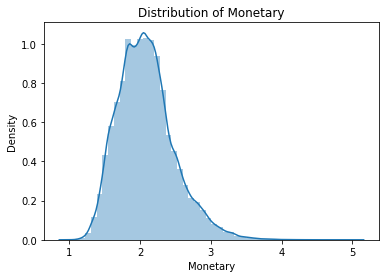

Monetary's: Skew: 0.729609897634013, : SkewtestResult(statistic=81.9204555191681, pvalue=0.0)


In [52]:
for col in rfm_df.columns[1:]:
    check_skew(rfm_df_log, col)

Now, I'll scale the data.

In [53]:
scaler = StandardScaler()
scaler.fit(rfm_df_log.drop("customer_unique_id", axis=1))
RFM_Table_scaled = scaler.transform(rfm_df_log.drop("customer_unique_id", axis=1))
# Put data into a df
RFM_Table_scaled = pd.DataFrame(RFM_Table_scaled, columns=rfm_df_log.columns[1:])

In [54]:
RFM_Table_scaled.head()

,Recency,Frequency,Monetary
0,-0.826858,-0.172439,0.164274
1,-0.807272,-0.172439,-1.635774
2,1.954465,-0.172439,-0.378506
3,0.544216,-0.172439,-1.120834
4,0.328762,-0.172439,0.521090


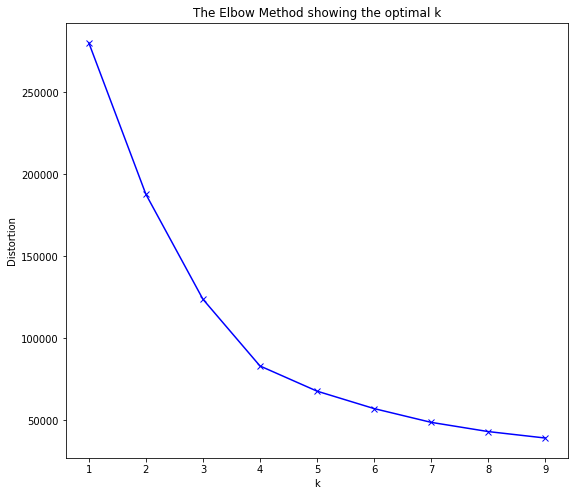

In [55]:
# Training k-means model

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(RFM_Table_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(9,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [56]:
# Train the model on 4 clusters
kmean_model = KMeans(n_clusters=4, random_state=5)
kmean_y = kmean_model.fit_predict(RFM_Table_scaled)
# Add labels to df
rfm_df['Cluster'] = kmean_model.labels_

In [57]:
# Function to visualize clusters
def rfm_values(df):
    df_new = df.groupby(['Cluster']).agg({
            'Recency': 'mean',
            'Frequency': 'mean',
            'Monetary': ['mean', 'count']
        }).round(0)

    return df_new

In [58]:
rfm_values(rfm_df)

Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0         146.0       1.0     82.0  40300
1         226.0       2.0    488.0   2807
2         426.0       1.0    124.0  27541
3         194.0       1.0    521.0  22748

The Frequency feature doesn't add that much value to the model since in our data most customers have made on average only one order (mean order per customer is 1.03). Moreover, most customers haven't ordered in a while.

**What does each cluster represent?**

* **Cluster 0** : This cluster can be interpreted as (*Relatively New Comers/Low spenders*) as their spending is the smallest among all clusters but have the lowest recency. This cluster is quite huge. So, some marketing effort could be advisable towards it in order to increase its monetary value. 

* **Cluster 1** : can be considered as our best one (*Loyal customers*) since although customers in this cluster haven't on avergae ordered in a while, their frequency of orders is greater than all other clusters and the value of their orders is quite high. 

* **Cluster 3** : (*Lost/Low spenders*) is the name we can give to this cluster. Customers in this cluster seem have one of the highest recency and their monetary value is low. This cluster shouldn't be the focus of marketing effort. 

* **Cluster 4** : This is our second best (*Big spenders*) cluster as it's recency comes second and the average amount spent is largest. This cluster is also second in terms of number of customers. 